In [207]:
import numpy as np
import random
import re
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
from numpy import linalg as LA
import scipy.io as sio   ## for loading octave matlab file
import math
import numpy.linalg as linalg

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import scipy.optimize #fmin_cg 

### Load Example Dataset

In [164]:
mat_contents = sio.loadmat(r"C:\Users\user\Documents\Machine learning\machine-learning-ex7\ex7\ex7data1.mat")
mat_contents

# training data stored in arrays X
X=mat_contents['X']
   #### taking out X from the matrix
m,n=X.shape
X[0]

array([3.38156267, 3.38911268])

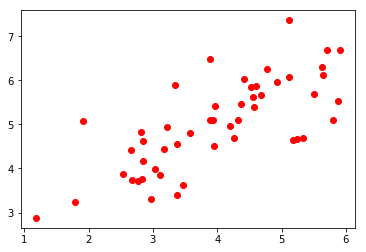

In [165]:
#visulaize the ex. dataset
plt.plot(X[:,0],X[:,1],'ro')
# 2D dataset which has one direction of large variation and one of smaller variation

In [166]:
# Before using PCA, it is important to ﬁrst normalize the data by subtracting the mean value of each feature from the 
# dataset,and scaling each dimension so that they are in the same range
def featureNormalize(normX):
    
    mean_array=np.zeros((normX.shape[1],1))
    std_array=np.zeros((normX.shape[1],1))
     
    for i in range(normX.shape[1]):
        
        mean=np.mean(normX[:,i])
        mean_array[i]=mean
        std=normX[:,i].std()
        std_array[i]=std

        normX[:,i]=(normX[:,i]-mean)/std
    return normX,mean_array.T,std_array.T

normX,mu,sigma = featureNormalize(X.copy())


## Run PCA

In [167]:
'''
After normalizing the data, you can run PCA to compute the principal components. 
PCA Run principal component analysis on the dataset X
%   [U, S, X] = pca(X) computes eigenvectors of the covariance matrix of X
%   Returns the eigenvectors U, the eigenvalues (on diagonal) in S
'''
def PCA(X):
    m,n = X.shape
    covar_mat = (1/m)*X.T.dot(X)
#    print(covar_mat)
    Evectors, Evalues, V = linalg.svd(covar_mat)
    return Evalues,Evectors


In [168]:
Evalues,Evectors = PCA(normX)
print(Evalues)
print()
print(Evectors)

[1.73553038 0.26446962]

[[-0.70710678 -0.70710678]
 [-0.70710678  0.70710678]]


Top eigenvector: 
 Evectors(:,0) =  -0.7071067811865474 -0.7071067811865475

(you should expect to see -0.707107 -0.707107)



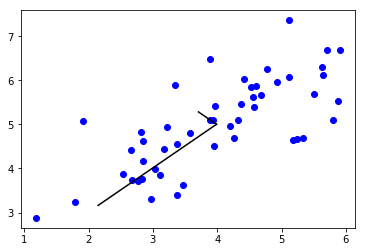

In [169]:
#Compute mu, the mean of the each feature Draw the eigenvectors centered at mean of data. These lines show the
#directions of maximum variations in the dataset.

plt.plot(X[:,0],X[:,1],'bo')

for i in range(len(Evalues)):
    x1 = [mu[0][0],(mu+1.5*Evalues[i]*Evectors[:,i])[0][0]]
    y1 = [mu[0][1],(mu+1.5*Evalues[i]*Evectors[:,i])[0][1]]
    plt.plot(x1,y1,'k-')

print('Top eigenvector: ');
print(' Evectors(:,0) = ', Evectors[0][0], Evectors[0][1])
print('\n(you should expect to see -0.707107 -0.707107)\n')


### Dimension Reduction

(-3, 3)

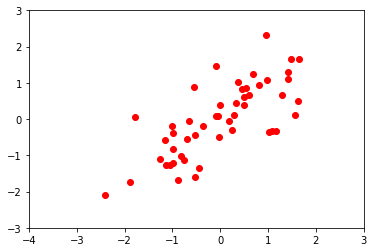

In [170]:

#Plot the normalized dataset (returned from pca)

plt.plot(normX[:, 0],normX[:, 1],'ro')
plt.xlim(-4,3)
plt.ylim(-3,3)

In [171]:
#  Project the data onto K = 1 dimension
K = 1
'''
 After computing the principal components, you can use them to reduce the feature dimension of your dataset by projecting
 each example onto a lower dimensional space, x(i) → z(i) (e.g., projecting the data from 2D to 1D). In this part of the 
 exercise, you will use the eigenvectors returned by PCA and project the example dataset into a 1-dimensional space. 
 In practice, if you were using a learning algorithm such as linear regression or perhapsneural networks, you could
 now use the projected data instead of the original data.By using the projected data, you can train your model faster as
 there are less dimensions in the input.

  You should now implement the projection step to map the data onto the first k eigenvectors. The code will then plot the 
  data in this reduced dimensional space.  This will show you what the data looks like when using only the corresponding
  eigenvectors to reconstruct it.

'''
'''
%PROJECTDATA Computes the reduced data representation when projecting only on to the top k eigenvectors 
Z = projectData(X, U, K) computes the projection of the normalized inputs X into the reduced dimensional space spanned by
the first K columns of U. It returns the projected examples in Z.
Compute the projection of the data using only the top K eigenvectors in U (first K columns).  For the i-th example X(i,:),
the projection on to the k-th eigenvector is given as follows:
x = X(i, :)
projection_k = x' * U(:, k)
'''

def projectData(X, U, K):
    U_reduce = Evectors[:,0:K]
    Z = (X).dot(U_reduce)  ## here I have done the vectorized implementation instead of loops
    return Z
Z = projectData(normX,Evalues,K)
#print(Z)

### Recover data

In [172]:
'''
After projecting the data onto the lower dimensional space, you can approximately 
recover the data by projecting them back onto the original high dimensional space. 
%   X_rec = RECOVERDATA(Z, U, K) recovers an approximation the 
%   original data that has been reduced to K dimensions. It returns the
%   approximate reconstruction in X_rec.
%
'''

def recoverData(Z, U, K):
    X_rec = np.zeros((Z.shape[0],U.shape[0]))
    U_reduce = Evectors[:,0:K]
    
    X_rec = U_reduce.dot(Z.T)    ## here I have done the vectorized implementation instead of loops
    
    return X_rec.T
X_rec = recoverData(Z,Evalues,K)
#print(X_rec)

(-4, 2)

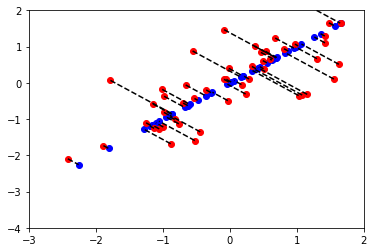

In [173]:
'''
now perform both the projection and approximate reconstruction to show how the projection 
aﬀects the data. In Figure, the original data points are indicated with the red pts
 while the projected data points are indicated with the blue circles. The projection 
 eﬀectively only retains the information in the direction given by U1.

'''

plt.plot(X_rec[:,0],X_rec[:,1],'bo')
plt.plot(normX[:,0],normX[:,1],'ro')


x1 = [normX[:,0],X_rec[:,0]]
y1 = [normX[:,1],X_rec[:,1]]
plt.plot(x1,y1,'k--')
plt.xlim(-3,2)
plt.ylim(-4,2)
#

### Loading and Visualizing Face Data

In [174]:
'''
%  We start the exercise by first loading and visualizing the dataset.
%  The following code will load the dataset into your environment
 run PCA on face images to see how it can be used in practice for dimension reduction
 The dataset ex7faces.mat contains a dataset3 X of face images, each 32×32 in grayscale. 
 Each row of X corresponds to one face image (a row vector of length 1024).
'''

mat_contents = sio.loadmat(r"C:\Users\user\Documents\Machine learning\machine-learning-ex7\ex7\ex7faces.mat")
mat_contents
# training data stored in arrays X
X=mat_contents['X']
   #### taking out X from the matrix
m,n = X.shape
m,n

(5000, 1024)

In [175]:
# the step  will be load and visualize the ﬁrst 100 of these face images 
X_selected = X[0:100,:]
X_selected.shape

(100, 1024)

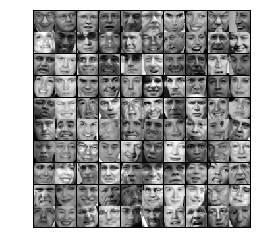

In [176]:
##  FUNCTION TO DISPLAY DATA This function maps each row to a 20 pixel by 20 pixel grayscale image and 
##  displays the images together
def displayData(X, example_width=None):
    # closes previously opened figure. preventing a
    # warning after opening too many figures
    plt.close()
# creates new figure 
    plt.figure()
# Set example_width automatically if not passed in
    if not example_width or not 'example_width' in locals():
        example_width = int(round(math.sqrt(X.shape[1])))
# Gray Image color map 
    plt.set_cmap("gray")
#Compute rows, cols
    m,n = X.shape
    example_height = int(n / example_width)
# Compute number of items to display
    display_rows = int(math.floor(math.sqrt(m)))
    display_cols = int(math.ceil(m / display_rows))
# Between images padding
    pad = 1
# Setup blank display
    display_array = -np.ones((pad + display_rows * (example_height + pad),  pad + display_cols * (example_width + pad)))
    curr_ex = 1
    #Copy each example into a patch on the display array    
    for j in range(1,display_rows+1):
        for i in range(1,display_cols+1):
            if curr_ex > m:
                break
            ##Copy the patch
            #Get the max value of the patch
            max_val = max(abs(X[curr_ex-1, :]))  
            rows = pad + (j - 1) * (example_height + pad) + np.array(range(example_height))
            cols = pad + (i - 1) * (example_width  + pad) + np.array(range(example_width ))
            display_array[rows[0]:rows[-1]+1 , cols[0]:cols[-1]+1] = np.reshape(X[curr_ex-1, :], (example_height, example_width), order="F") / max_val
            curr_ex += 1
        if curr_ex > m:
            break
    # Display Image
    h = plt.imshow(display_array, vmin=-1, vmax=1)
    # Do not show axis
    plt.axis('off')
    plt.show(block=False)
    #return h, display_array
displayData(X_selected)


### PCA on Face Data: Eigenfaces

In [177]:
#Run PCA and visualize the eigenvectors which are in this case eigenfaces  We display the first 36 eigenfaces.
#Before running PCA, it is important to first normalize X by subtracting the mean value from each feature
normX,mu,sigma = featureNormalize(X.copy())

#run pca
Evalues,Evectors = PCA(normX)
'''

 Notice that each principal component in U (each column) is a vector of 
 length n (where for the face dataset, n = 1024). It turns out that we
 can visualize these principal components by reshaping each of them into
 a 32×32 matrix that corresponds to the pixels in the original dataset
'''

'\n\n Notice that each principal component in U (each row) is a vector of \n length n (where for the face dataset, n = 1024). It turns out that we\n can visualize these principal components by reshaping each of them into\n a 32×32 matrix that corresponds to the pixels in the original dataset\n'

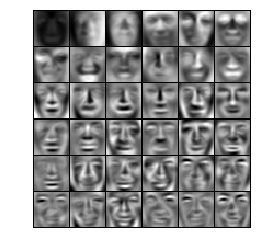

In [178]:
#Visualize the top 36 eigenvectors found
'''
 displays the ﬁrst 36 principal components that describe the largest
 variations (Figure 8). If you want, you can also change the code to
 display more principal components to see how they capture more and more details.

'''
displayData(Evectors[:,0:36].T)   ##note the transpose here

### Dimension Reduction for Faces 

In [179]:
'''
Now that you have computed the principal components for the face dataset,
you can use it to reduce the dimension of the face dataset. 
This allows you to use your learning algorithm with a smaller input size (e.g., 100 dimensions) 
instead of the original 1024 dimensions. This can help speed up your learning algorithm.

Project images to the eigen space using the top k eigenvectors 
%  If you are applying a machine learning algorithm 
'''

K = 100
Z = projectData(normX,Evalues,K)
print('The projected data Z has a size of: ')
print(Z.size)
print('The projected data Z has a shape of: ')
print(Z.shape)


The projected data Z has a size of: 
500000
The projected data Z has a shape of: 
(5000, 100)


## Visualization of Faces after PCA Dimension Reduction

ORIGINAL FACES


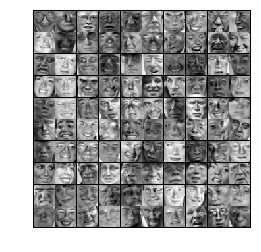

recovered FACES


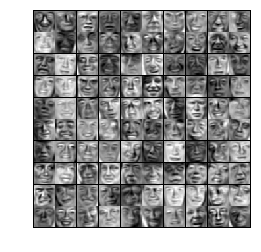

In [180]:
'''
To understand what is lost in the dimension reduction, you can recover the data 
using only the projected dataset. In ex7 pca.m, an approximate recovery of the
data is performed and the original and projected face images are displayed side 
by side (Figure 9). From the reconstruction, you can observe that the general 
structure and appearance of the face are kept while the ﬁne details are lost. 
This is a remarkable reduction (more than 10×) in 
the dataset size that can help speed up your learning algorithm signiﬁcantly. 
Project images to the eigen space using the top K eigen vectors and 
%  visualize only using those K dimensions
%  Compare to the original input, which is also displayed

'''

K = 100
X_rec = recoverData(Z,Evalues,K)
print('ORIGINAL FACES')
displayData(normX[0:100,:])   

print('recovered FACES')
displayData(X_rec[0:100,:])   


## Optional (ungraded) Exercise: PCA for Visualization

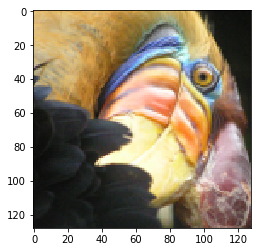

In [183]:
'''
 One useful application of PCA is to use it to visualize high-dimensional
%  data. In the last K-Means exercise you ran K-Means on 3-dimensional 
%  pixel colors of an image. We first visualize this output in 3D, and then
%  apply PCA to obtain a visualization in 2D.

'''
import imageio
A = imageio.imread(r'C:\Users\user\Documents\Machine learning\machine-learning-ex7\ex7\bird_small.png')
plt.imshow(A)

# since image is of 128 * 128 px, so each row contains 128 pxs and every pixel has 3 intensites i.e. red blue and green 

#ForEg, we have 185 in 1st row, 2nd column, since it is the 2nd value therefore it is green color intensity
A = A/255


In [182]:

def findClosestCentroids(X,centroids):
    K = len(centroids)  # set K
    
    idx = np.zeros((len(X),1))   ## vector containing the indexes of centroid closest to example i. 
                            ## Hence, it should be a value in the range 1..K
   
    
    # THIS IS A VECTORIZED METHOD WHICH USES ONLY ONE LOOP , IT MAKES THE CODE RUN FASTER 
    temp = np.zeros((len(X),K))
    
    for i in range(K):
        
        temp[:,i] = ((X - centroids[i])**2 ).sum(axis = 1)    ### note that here math.hypot will 
                                                                                      ## not work. it's a propery of np to 
    idx = np.argmin(temp,axis = 1) + 1                                                # subtract a element from an array
    return idx
     

def computeCentroids(X, idx, K):
    m,n = X.shape
    centroids = np.zeros((K,n))
   
    # THIS IS A GOOD APPROACH THAN BOOLEAN ARRAY
    
    for i in range(1,K+1):
        temp = X[np.where(idx == i)]   ## TAKING OUT THOSE ROWS OF X WHICH HAVE SAME CLUSTER 
        
        centroids[i-1] = temp.mean(0)   # assigning mean mean of all cluster values to a new centroid
     
    return centroids
        

'''This function initializes K centroids that are to be 
%used in K-Means on the dataset X'''
def kMeansInitCentroids(X, K):
    centroids = np.zeros((K,X.shape[1]))          
                                            #You should set centroids to randomly chosen examples from the dataset X
    randidx = np.random.permutation(len(X))    ## making a random permutation This allows the examples to be selected at 
                                           ##random without the risk of selecting the same example twice.
    centroids = X[randidx[0:K],:]     ## taking first K element out of that random X
    return centroids

'''
%RUNKMEANS runs the K-Means algorithm on data matrix X, where each row of X
%is a single example
%   It uses initial_centroids used as the
%   initial centroids. max_iters specifies the total number of interactions 
%   of K-Means to execute. plot_progress is a true/false flag that 
%   indicates if the function should also plot its progress as the 
%   learning happens. This is set to false by default. runkMeans returns 
%   centroids, a Kxn matrix of the computed centroids and idx, a m x 1 
%   vector of centroid assignments (i.e. each entry in range [1..K])
'''

def runkMeans(X, initial_centroids,max_iters, plot_progress):
    m,n=X.shape
    K = len(initial_centroids)
    centroids = initial_centroids
    previous_centroids = centroids
    idx = np.zeros((m, 1))

    '''
    There can be some other methods to do the same like making a 3d array which contians the centroids after every iteration
    and plot it. another method can be making a 2d array containing the centroid history and plot it.
    
    here I have simply stored the centroid and prev centroids and plot them by making a line between them 
    '''
  
    for i in range(1,max_iters+1):
        idx = findClosestCentroids(X,centroids)

        centroids = computeCentroids(X, idx, K)
        if plot_progress == True:
            for j in range(K):
                temp = X[np.where(idx == j+1)]
                plt.plot(temp[:,0],temp[:,1],"o")
                plt.plot([centroids[j][0],previous_centroids[j][0]],[centroids[j][1],previous_centroids[j][1]],'black',linestyle='--',marker="*",linewidth=1.4)
        previous_centroids = centroids    
    return idx,centroids
    


In [232]:
img_size = A.shape

p = img_size[0]
q = img_size[1]
r = img_size[2]

X = A.reshape(p*q,3)

print('shape of X is',X.shape)

K = 16
max_iters = 10

initial_centroids = kMeansInitCentroids(X, K)

idx,centroids = runkMeans(X, initial_centroids,max_iters, True)
 # Sample 1000 random indexes 
sel = random.sample(range(0, 16384), 1000)
len(set(sel))

shape of X is (16384, 3)


1000

<IPython.core.display.Javascript object>


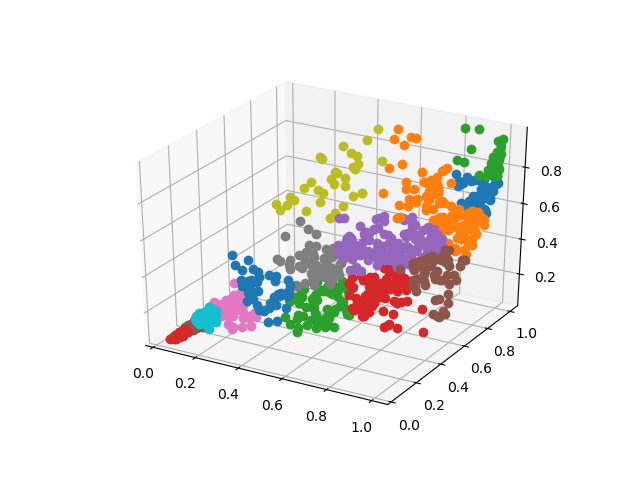

(54, 3)
(55, 3)
(70, 3)
(81, 3)
(77, 3)
(82, 3)
(61, 3)
(57, 3)
(34, 3)
(87, 3)
(49, 3)
(48, 3)
(38, 3)
(82, 3)
(60, 3)
(65, 3)


<function matplotlib.pyplot.close(*args)>

In [277]:
'''
In the earlier K-means image compression exercise, you used the K-means algorithm in the 3-dimensional RGB space.
visualize the ﬁnal pixel assignments in this 3D space  Each data point is colored according to the cluster
it has been assigned to. You can drag your mouse on the ﬁgure to rotate and inspect this data in 3 dimensions. 
'''

%matplotlib notebook
data1 = X[sel]

ax = plt.axes(projection='3d')
for j in range(K):
    temp = data1[np.where(idx[sel] == j+1)]
    print(temp.shape)
    ax.plot3D(temp[:,0],temp[:,1],temp[:,2],'o')
plt.close

## Optional (ungraded) Exercise: PCA for Visualization 

In [283]:
#Use PCA to project this cloud to 2D for visualization

# Subtract the mean to use PCA
'''
It turns out that visualizing datasets in 3 dimensions or greater can be cumbersome. 
Therefore, it is often desirable to only display the data in 2D even at the cost of losing some information. 
In practice, PCA is often used to reduce the dimensionality of data for visualization purposes.
 implementation of PCA to the 3dimensional data to reduce it to 2 dimensions and visualize the
 result in a 2D scatter plot. The PCA projection can be thought of as a rotation that selects
 the view that maximizes the spread of the data, which often corresponds to the “best” view

'''
normX,mu,sigma = featureNormalize(X.copy())
#PCA and project the data to 2D
Evalues,Evectors = PCA(normX)
Z = projectData(normX,Evalues,2)

<IPython.core.display.Javascript object>


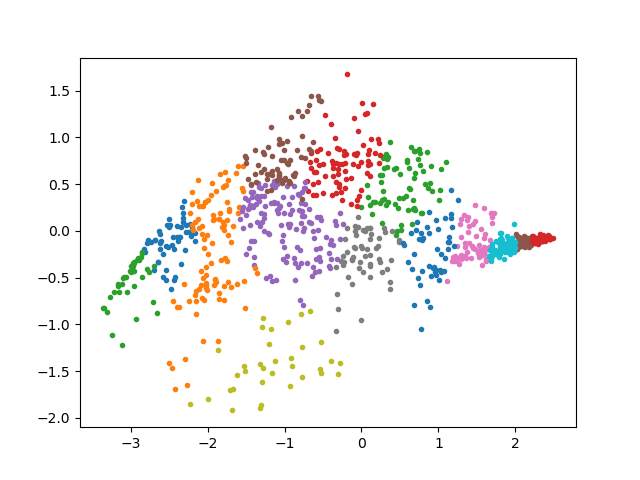

In [284]:

for j in range(K):
    data2 = Z[sel]
    temp = data2[np.where(idx[sel] == j+1)]
    plt.plot(temp[:,0],temp[:,1],".")